In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from mlxtend.frequent_patterns import apriori,association_rules

In [5]:
data=pd.read_csv('groceries1.csv')
data

,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,item25,item26,item27,item28,item29,item30,item31,item32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,flour,coffee,red/blush wine,salty snack,chocolate,hygiene articles,napkins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data=data.replace(np.NAN,'',regex=True)
data

,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,item25,item26,item27,item28,item29,item30,item31,item32
0,citrus fruit,semi-finished bread,margarine,ready soups,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,tropical fruit,yogurt,coffee,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,whole milk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,pip fruit,yogurt,cream cheese,meat spreads,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,other vegetables,whole milk,condensed milk,long life bakery product,,,,,,,,,,,,,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,flour,coffee,red/blush wine,salty snack,chocolate,hygiene articles,napkins,,,,,,,,,,,,,,,
9831,cooking chocolate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,,,,,,,,,,,,,,,,,,,,,,
9833,semi-finished bread,bottled water,soda,bottled beer,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [7]:
trans=[]
for i in range(0,9835):
    trans.append([str(data.values[i,u])for u in range(0,32)])
trans    

[['citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['tropical fruit',
  'yogurt',
  'coffee',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['whole milk',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['pip fruit',
  'yogurt',
  'cream cheese ',
  'meat spreads',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product',
  '',
  '',
 

In [10]:
data_series=pd.DataFrame(pd.Series(trans))
data_series.columns=['transaction']
data_series

,transaction
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee, , , , , , , ,..."
2,"[whole milk, , , , , , , , , , , , , , , , , ,..."
3,"[pip fruit, yogurt, cream cheese , meat spread..."
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9830,"[sausage, chicken, beef, hamburger meat, citru..."
9831,"[cooking chocolate, , , , , , , , , , , , , , ..."
9832,"[chicken, citrus fruit, other vegetables, butt..."
9833,"[semi-finished bread, bottled water, soda, bot..."


In [11]:
x=data_series['transaction'].str.join(sep=',').str.get_dummies(sep=',')
x

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen chicken,frozen dessert,...,pickled vegetables,pip fruit,popcorn,pork,pot plants,potato products,preservation products,processed cheese,prosecco,pudding powder,ready soups,red/blush wine,rice,roll products,rolls/buns,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [13]:
frequent_set=apriori(x,min_support=0.005,max_len=3,use_colnames=True)
frequent_set

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
984,0.010473,"(yogurt, soda, whole milk)"
985,0.007931,"(tropical fruit, whole milk, whipped/sour cream)"
986,0.006202,"(tropical fruit, yogurt, whipped/sour cream)"
987,0.015150,"(tropical fruit, yogurt, whole milk)"


In [14]:
rule1=association_rules(frequent_set,metric='lift',min_threshold=1)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(bottled water),0.033452,0.110524,0.007321,0.218845,1.980074,0.003624,1.138668
1,(bottled water),(UHT-milk),0.110524,0.033452,0.007321,0.066237,1.980074,0.003624,1.035111
2,(UHT-milk),(other vegetables),0.033452,0.193493,0.008134,0.243161,1.256694,0.001662,1.065626
3,(other vegetables),(UHT-milk),0.193493,0.033452,0.008134,0.042039,1.256694,0.001662,1.008964
4,(UHT-milk),(rolls/buns),0.033452,0.183935,0.006406,0.191489,1.041071,0.000253,1.009344
...,...,...,...,...,...,...,...,...,...
2695,"(yogurt, whipped/sour cream)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
2696,"(whole milk, whipped/sour cream)",(yogurt),0.032232,0.139502,0.010880,0.337539,2.419607,0.006383,1.298943
2697,(yogurt),"(whole milk, whipped/sour cream)",0.139502,0.032232,0.010880,0.077988,2.419607,0.006383,1.049627
2698,(whole milk),"(yogurt, whipped/sour cream)",0.255516,0.020742,0.010880,0.042579,2.052747,0.005580,1.022807


C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='lift'>

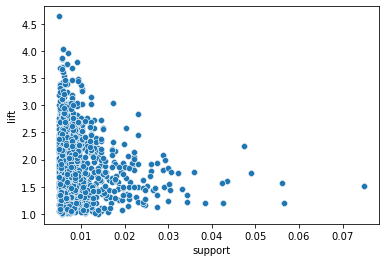

In [15]:
sns.scatterplot(rule1.support,rule1.lift)

In [17]:
frequent_set2=apriori(x,min_support=0.007,max_len=3,use_colnames=True)
frequent_set2

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
586,0.007829,"(tropical fruit, soda, whole milk)"
587,0.010473,"(yogurt, soda, whole milk)"
588,0.007931,"(tropical fruit, whole milk, whipped/sour cream)"
589,0.015150,"(tropical fruit, yogurt, whole milk)"


In [18]:
rule2=association_rules(frequent_set2,metric='lift',min_threshold=2)
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(baking powder),0.193493,0.017692,0.007321,0.037835,2.138547,0.003898,1.020935
1,(baking powder),(other vegetables),0.017692,0.193493,0.007321,0.413793,2.138547,0.003898,1.375807
2,(baking powder),(whole milk),0.017692,0.255516,0.009253,0.522989,2.046793,0.004732,1.560725
3,(whole milk),(baking powder),0.255516,0.017692,0.009253,0.036212,2.046793,0.004732,1.019216
4,(pork),(beef),0.057651,0.052466,0.007626,0.132275,2.521174,0.004601,1.091976
...,...,...,...,...,...,...,...,...,...
427,"(yogurt, whipped/sour cream)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
428,"(whole milk, whipped/sour cream)",(yogurt),0.032232,0.139502,0.010880,0.337539,2.419607,0.006383,1.298943
429,(yogurt),"(whole milk, whipped/sour cream)",0.139502,0.032232,0.010880,0.077988,2.419607,0.006383,1.049627
430,(whole milk),"(yogurt, whipped/sour cream)",0.255516,0.020742,0.010880,0.042579,2.052747,0.005580,1.022807


In [20]:
rule2.sort_values('lift',ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
60,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
61,(herbs),(root vegetables),0.016268,0.108998,0.007016,0.431250,3.956477,0.005243,1.566596
8,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
9,(whipped/sour cream),(berries),0.071683,0.033249,0.009049,0.126241,3.796886,0.006666,1.106428
91,"(beef, other vegetables)",(root vegetables),0.019725,0.108998,0.007931,0.402062,3.688692,0.005781,1.490123
...,...,...,...,...,...,...,...,...,...
343,(whole milk),"(other vegetables, yogurt)",0.255516,0.043416,0.022267,0.087147,2.007235,0.011174,1.047905
14,(butter),(fruit/vegetable juice),0.055414,0.072293,0.008033,0.144954,2.005097,0.004026,1.084979
15,(fruit/vegetable juice),(butter),0.072293,0.055414,0.008033,0.111111,2.005097,0.004026,1.062659
87,(yogurt),(tropical fruit),0.139502,0.104931,0.029283,0.209913,2.000475,0.014645,1.132873


C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='lift'>

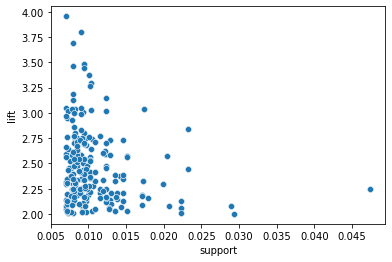

In [25]:
sns.scatterplot(rule2.support,rule2.lift)

In [22]:
frequent_set3=apriori(x,min_support=0.01,max_len=4,use_colnames=True)
frequent_set3

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(tropical fruit, root vegetables, whole milk)"
329,0.014540,"(root vegetables, yogurt, whole milk)"
330,0.010473,"(yogurt, soda, whole milk)"
331,0.015150,"(tropical fruit, yogurt, whole milk)"


In [23]:
rule3=association_rules(frequent_set3,metric='lift',min_threshold=2)
rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
1,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
2,(berries),(yogurt),0.033249,0.139502,0.010574,0.318043,2.279848,0.005936,1.261807
3,(yogurt),(berries),0.139502,0.033249,0.010574,0.075802,2.279848,0.005936,1.046043
4,(root vegetables),(butter),0.108998,0.055414,0.012913,0.118470,2.137897,0.006873,1.071530
...,...,...,...,...,...,...,...,...,...
155,"(yogurt, whipped/sour cream)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
156,"(whole milk, whipped/sour cream)",(yogurt),0.032232,0.139502,0.010880,0.337539,2.419607,0.006383,1.298943
157,(yogurt),"(whole milk, whipped/sour cream)",0.139502,0.032232,0.010880,0.077988,2.419607,0.006383,1.049627
158,(whole milk),"(yogurt, whipped/sour cream)",0.255516,0.020742,0.010880,0.042579,2.052747,0.005580,1.022807


C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='lift'>

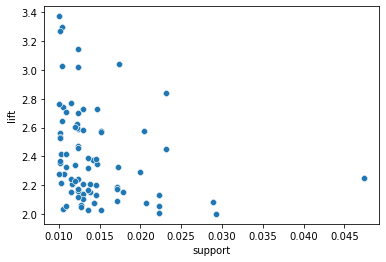

In [24]:
sns.scatterplot(rule3.support,rule3.lift)